|scikit-learnを用いてk-最近傍法アルゴリズムが適用できるかを見る|
|:-|

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
# random_stateに整数値を設定すると，その値をシード値として使用し，同じデータセットに対して何度実行しても同じようにデータが分割される．
# random_stateを設定しない場合，またはNoneに設定した場合，毎回異なる分割が行われる．
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X")
print(X)
print("y")
print(y)


X
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
y
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


In [ ]:
# 分割された訓練データを表示
print("X_train")
print(X_train)
print("y_train")
print(y_train)

X_train
[[ 8.92229526 -0.63993225]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [ 7.99815287  4.8525051 ]
 [11.0329545  -0.16816717]
 [ 9.17748385  5.09283177]
 [11.563957    1.3389402 ]
 [ 9.15072323  5.49832246]
 [ 8.34810316  5.13415623]
 [11.93027136  4.64866327]
 [ 8.1062269   4.28695977]
 [ 8.67494727  4.47573059]
 [ 9.67284681 -0.20283165]
 [ 9.50169345  1.93824624]
 [ 8.69289001  1.54322016]
 [ 9.96346605  4.59676542]
 [ 9.50048972 -0.26430318]
 [ 9.25694192  5.13284858]
 [ 8.68937095  1.48709629]]
y_train
[0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0]


In [ ]:
# 分割されたテストデータを表示
print("X_test")
print(X_test)
print("y_test")
print(y_test)

X_test
[[11.54155807  5.21116083]
 [10.06393839  0.99078055]
 [ 9.49123469  4.33224792]
 [ 8.18378052  1.29564214]
 [ 8.30988863  4.80623966]
 [10.24028948  2.45544401]
 [ 8.34468785  1.63824349]]
y_test
[1 0 1 0 1 1 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("Test set predictions: {}".format(clf.predict(X_test))) 
#テストデータに対して予測を行うにはpredictメソッドを呼び出す．テストセットのそれぞれのデータポイントに対して，
#訓練セットの中から最近傍点を計算し，最も多いクラスを見つけ出す．

Test set predictions: [1 0 1 0 1 0 0]


y_test（解答）は [1 0 1 0 1 1 0] だが，predictions（回答）は [1 0 1 0 1 0 0] なので正解率は6/7で0.86．

In [ ]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test))) #テストセットに対する精度

Test set accuracy: 0.86


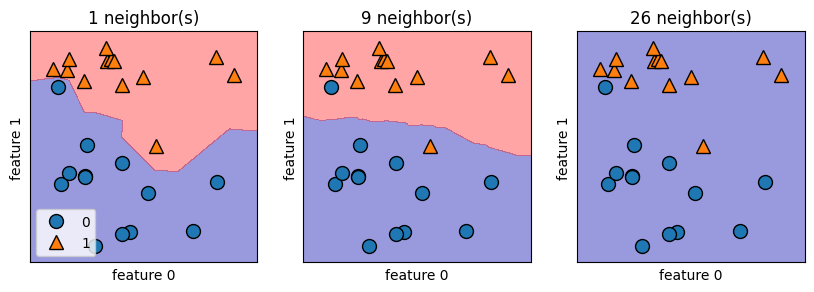

In [ ]:
#kが1,3,9の場合の決定境界を描画する
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 9, 26], axes):
    #fitメソッドは自分自身を返すので，１行で
    #インスタンスを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) # X, y = mglearn.datasets.make_forge()
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

左の図からわかるように，一つの最近傍点のみを用いると，決定境界は，訓練データに近くなる．より多くの最近傍点を考慮すると，決定境界はよりなめらかになる．なめらかな境界は，単純なモデルに対応する．つまり，最近傍点が少ない場合は複雑度の高いモデル（訓練精度が高く，テスト精度が低い．また，それぞれの精度が乖離している）最近傍点が多い場合は複雑度の低いモデル（訓練精度とテスト精度の差が小さい）に対応している。また、近傍点数を訓練データセットのすべてのデータポイントの数にしたものが右の図である。すべてのテストデータは全く同じ近傍点を持つので、すべてのテストデータに対する予測結果は全く同じになる。予測結果は訓練セット中で最も多いクラスになる。（今回はクラス0とクラス1の数が同じなので、順番の早いクラス0が結果として出力されているか？）

**1 neighbor(s)の意味**  
図中の任意の場所に点を打ったとき，その点から最も近い1点のクラスがその点のクラスとして予想される．  
**9 neighbor(s)の意味**  
図中の任意の場所に点を打ったとき，その点から最も近い9点のクラスがその点のクラスとして予想される．左図と比べて境界が滑らかになっている．  
**1 neighbor(s)の意味**  
図中の任意の場所に点を打ったとき，その点から最も近い26点（すべての点）のクラスがその点のクラスとして予想される．どこに点を打ってもすべての点が最近傍点と認識される．なので訓練セット中で最も多いクラスが予測結果になるが，今回は同数なので順番の速いクラス（クラス0）が予測結果として出力されていると考えられる．